In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error
import warnings
from scipy.stats import describe
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle
import networkx as nx
import plotly.graph_objects as go

In [4]:
# Read the dataset
df = pd.read_csv("combined_table.csv")

In [7]:
# Verify data structure
print("Class of df:")
print(type(df))  # Should be <class 'pandas.core.frame.DataFrame'>

print("Dimensions of df:")
print(df.shape)  # Should be (30000, 25)

print("Column names:")
print(df.columns.tolist())

Class of df:
<class 'pandas.core.frame.DataFrame'>
Dimensions of df:
(30000, 27)
Column names:
['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'ID.1', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default.payment.next.month', 'ID.2', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


In [9]:
print("Total missing values:")
print(df.isna().sum().sum())

print("Missing values per column:")
print(df.isna().sum())

Total missing values:
0
Missing values per column:
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
ID.1                          0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
ID.2                          0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
dtype: int64


In [11]:
# Summary statistics for numerical variables
print("Summary statistics for numerical variables:")
print(df.describe())

# Frequency and proportion for categorical variables
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE', 'default.payment.next.month']
for col in categorical_cols:
    print(f"\nFrequency of {col}:")
    print(df[col].value_counts())
    print(f"\nProportion of {col}:")
    print(df[col].value_counts(normalize=True))

Summary statistics for numerical variables:
                 ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.842267      1.557267   
std     8660.398374   129747.661567      0.489129      0.744494      0.521405   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE          ID.1      BILL_AMT1      BILL_AMT2     BILL_AMT3  \
count  30000.000000  30000.000000   30000.000000   30000.000000  3.000000e+04   
mean      35.485500  15000.500000   51223.330900   49179.075167 

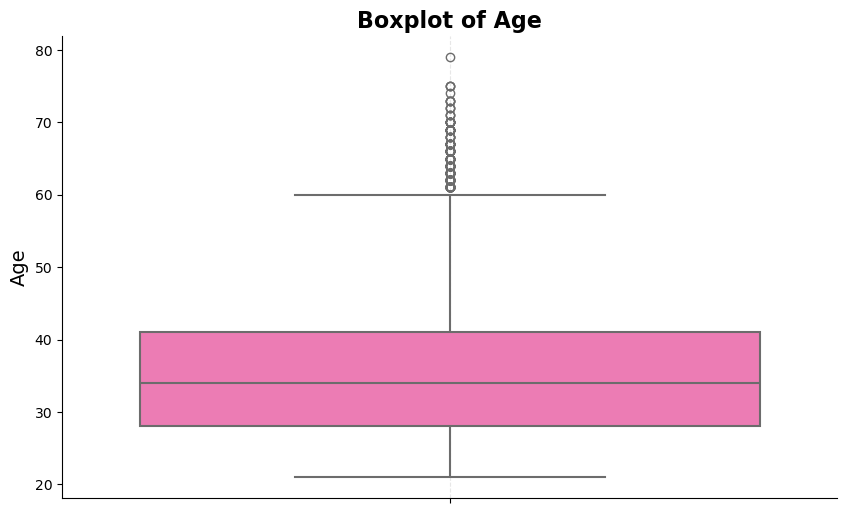

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['AGE'], color='#FF69B4', linewidth=1.5)  # Vibrant pink
plt.title('Boxplot of Age', fontsize=16, weight='bold')
plt.ylabel('Age', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('age_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

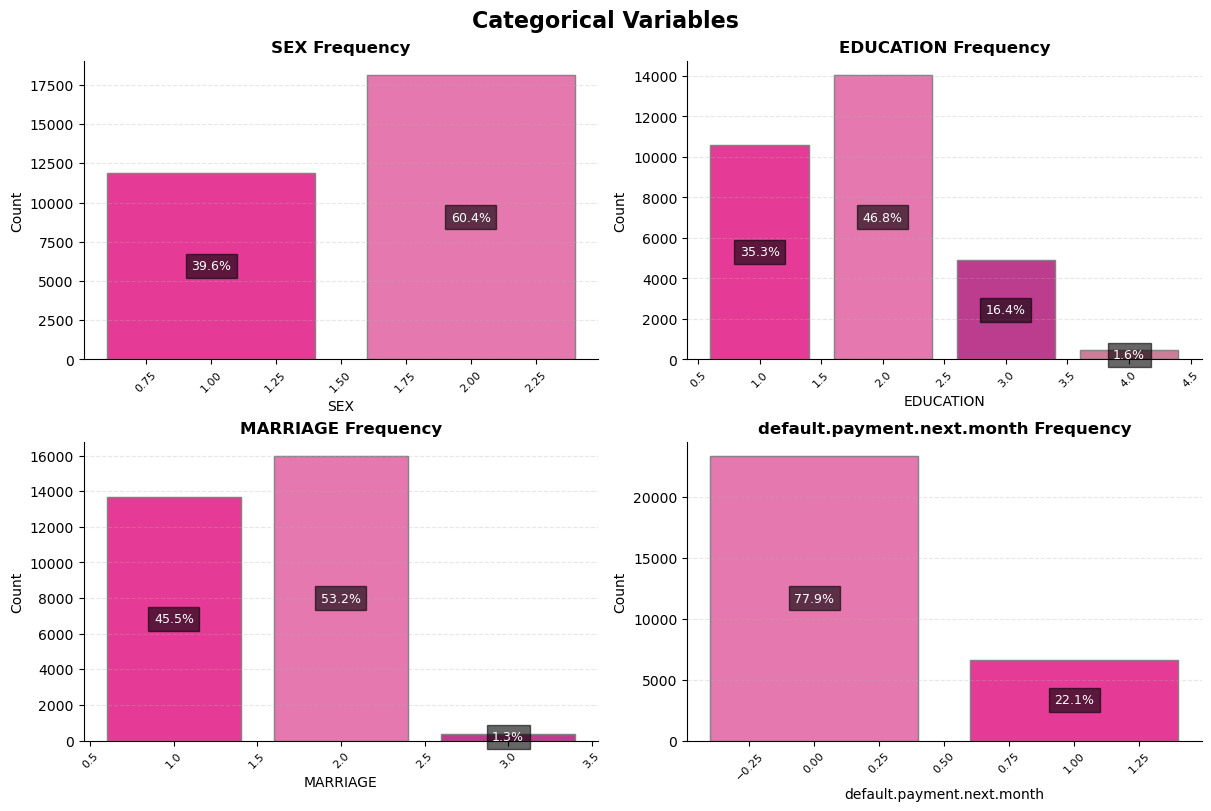

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()
colors = sns.color_palette(["#FF69B4", "#FF1493", "#C71585", "#DB7093"], n_colors=10)  # Vibrant pink shades

for i, col in enumerate(categorical_cols):
    if col in df.columns:
        freq = df[col].value_counts().sort_values(ascending=False)
        prop = df[col].value_counts(normalize=True).sort_values(ascending=False) * 100
        bars = axes[i].bar(freq.index, freq.values, color=colors[:len(freq)], edgecolor='grey', alpha=0.9)
        
        for bar, value, percentage in zip(bars, freq.values, prop.values):
            axes[i].add_patch(Rectangle((bar.get_x(), 0), bar.get_width(), bar.get_height(), 
                                       color='gray', alpha=0.2))
            axes[i].text(bar.get_x() + bar.get_width()/2, value * 0.5, f'{percentage:.1f}%', 
                         ha='center', va='center', fontsize=9, color='white', 
                         bbox=dict(facecolor='black', alpha=0.6))
        
        axes[i].set_title(f'{col} Frequency', fontsize=12, weight='bold')
        axes[i].set_xlabel(col, fontsize=10)
        axes[i].set_ylabel('Count', fontsize=10)
        axes[i].tick_params(axis='x', rotation=45, labelsize=8)
        axes[i].grid(axis='y', linestyle='--', alpha=0.3)
        axes[i].spines[['top', 'right']].set_visible(False)
    else:
        print(f"Error: Column '{col}' not found")
        axes[i].set_title(f'{col} Not Found', fontsize=12)
        axes[i].set_axis_off()

fig.suptitle('Categorical Variables', fontsize=16, weight='bold')
plt.savefig('categorical_frequencies.png', dpi=300, bbox_inches='tight')
plt.savefig('categorical_frequencies.svg', bbox_inches='tight')
plt.show()

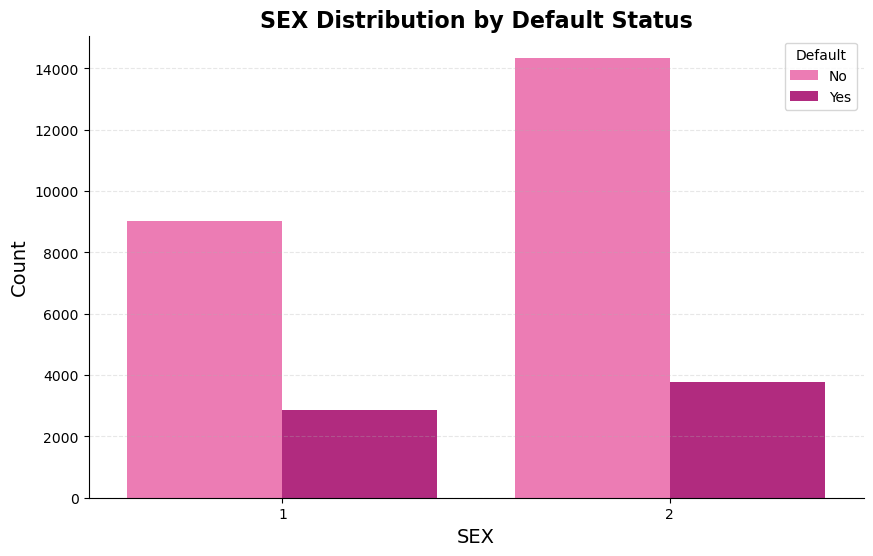

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SEX', hue='default.payment.next.month', 
              palette=['#FF69B4', '#C71585'])  # Pink shades for No/Yes
plt.title('SEX Distribution by Default Status', fontsize=16, weight='bold')
plt.xlabel('SEX', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Default', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig('sex_by_default_pink.png', dpi=300, bbox_inches='tight')
plt.show()

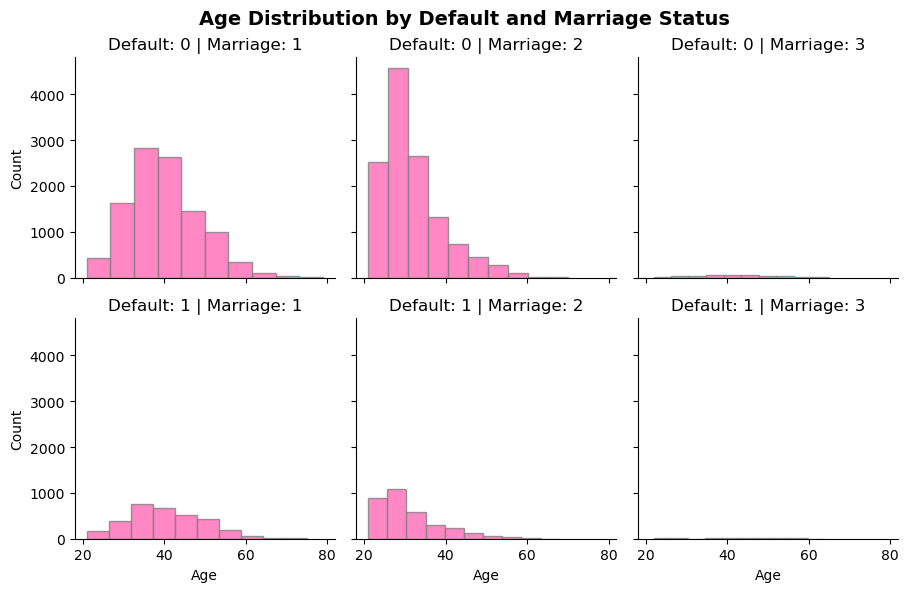

In [17]:
g = sns.FacetGrid(df, row='default.payment.next.month', col='MARRIAGE')
g = g.map(plt.hist, 'AGE', color='#FF69B4', alpha=0.8, edgecolor='grey')
g.set_titles(row_template='Default: {row_name}', col_template='Marriage: {col_name}', size=12)
g.set_axis_labels('Age', 'Count', fontsize=10)
g.figure.suptitle('Age Distribution by Default and Marriage Status', fontsize=14, weight='bold')
g.figure.subplots_adjust(top=0.9)  # Adjust for suptitle
plt.savefig('age_by_default_marriage_pink.png', dpi=300, bbox_inches='tight')
plt.show()

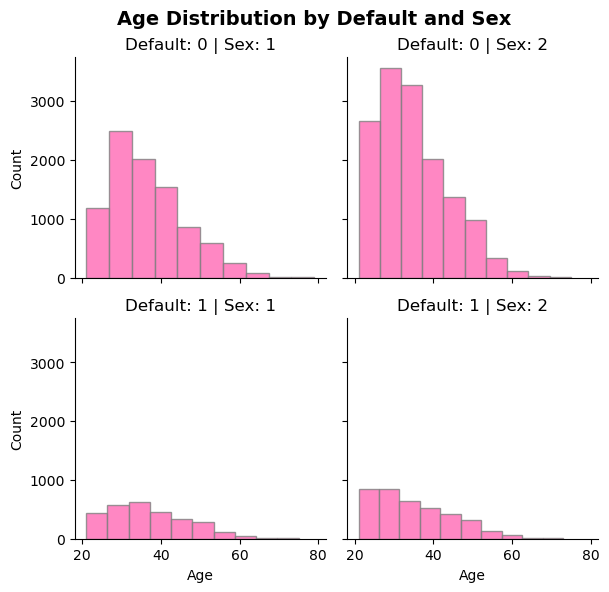

In [18]:
g = sns.FacetGrid(df, row='default.payment.next.month', col='SEX')
g = g.map(plt.hist, 'AGE', color='#FF69B4', alpha=0.8, edgecolor='grey')
g.set_titles(row_template='Default: {row_name}', col_template='Sex: {col_name}', size=12)
g.set_axis_labels('Age', 'Count', fontsize=10)
g.figure.suptitle('Age Distribution by Default and Sex', fontsize=14, weight='bold')
g.figure.subplots_adjust(top=0.9)  # Adjust for suptitle
plt.savefig('age_by_default_sex_pink.png', dpi=300, bbox_inches='tight')
plt.show()

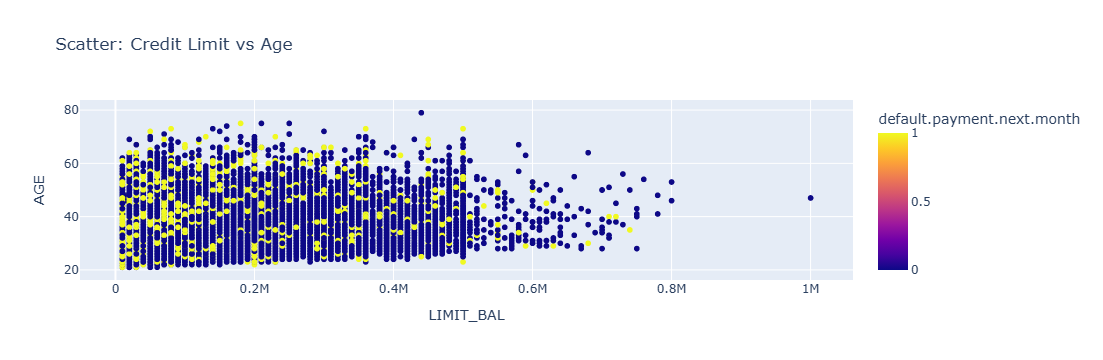

In [23]:
import plotly.express as px
fig = px.scatter(df, x='LIMIT_BAL', y='AGE', color='default.payment.next.month', 
                 title='Scatter: Credit Limit vs Age', 
                 color_discrete_sequence=px.colors.qualitative.Set2)
fig.show()

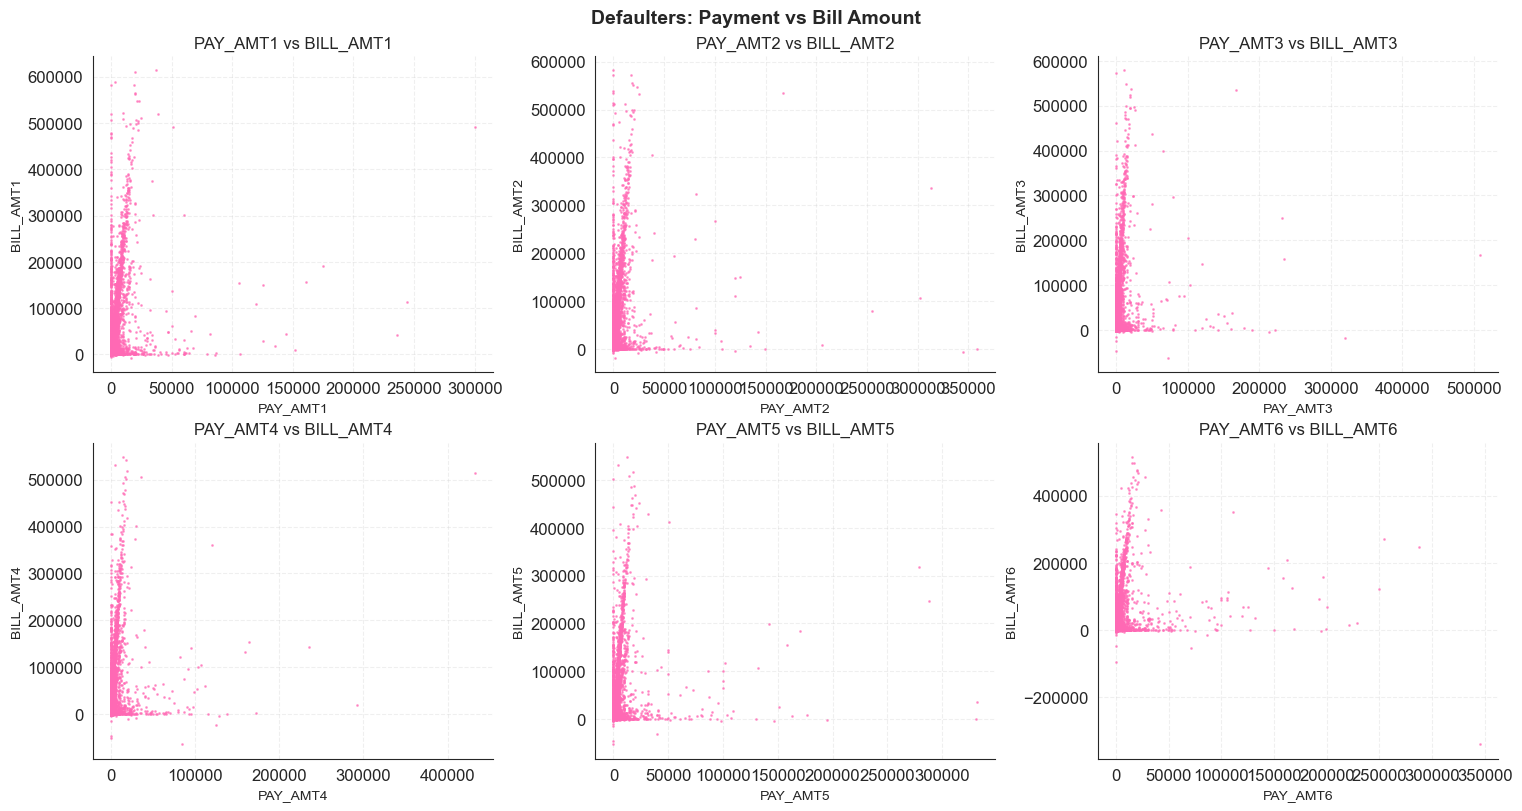

In [24]:
import matplotlib.pyplot as plt
# Set style
sns.set_style("white")
plt.rcParams['font.size'] = 12

# Filter defaulters
defaulters = df[df['default.payment.next.month'] == 1]

# Define pairs
pairs = [
    ('PAY_AMT1', 'BILL_AMT1'),
    ('PAY_AMT2', 'BILL_AMT2'),
    ('PAY_AMT3', 'BILL_AMT3'),
    ('PAY_AMT4', 'BILL_AMT4'),
    ('PAY_AMT5', 'BILL_AMT5'),
    ('PAY_AMT6', 'BILL_AMT6')
]

# Create figure
fig, axes = plt.subplots(2, 3, figsize=(15, 8), constrained_layout=True)
axes = axes.flatten()

# Plot static scatter plots
for i, (pay_col, bill_col) in enumerate(pairs):
    ax = axes[i]
    ax.scatter(defaulters[pay_col], defaulters[bill_col], c='#FF69B4', s=1, alpha=0.6)
    ax.set_title(f'{pay_col} vs {bill_col}', fontsize=12)
    ax.set_xlabel(pay_col, fontsize=10)
    ax.set_ylabel(bill_col, fontsize=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines[['top', 'right']].set_visible(False)

fig.suptitle('Defaulters: Payment vs Bill Amount', fontsize=14, weight='bold')
plt.savefig('defaulters_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Define variables
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']
colors = sns.color_palette("Set2", n_colors=2)  # For default: 0 (No), 1 (Yes)

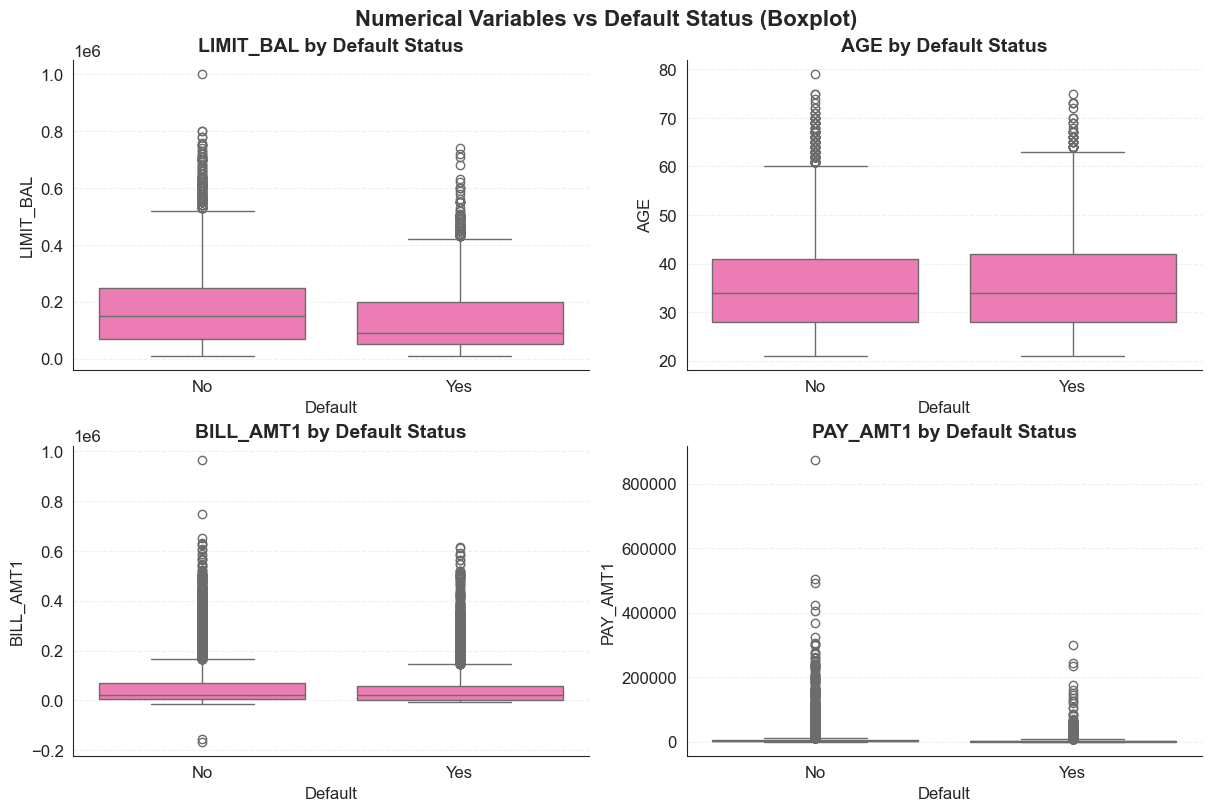

In [29]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

# Plot boxplots for numerical columns
for i, col in enumerate(numerical_cols):
    if col in df.columns:
        sns.boxplot(data=df, x='default.payment.next.month', y=col, color='#FF69B4', ax=axes[i])
        axes[i].set_title(f'{col} by Default Status', fontsize=14, weight='bold')
        axes[i].set_xlabel('Default', fontsize=12)
        axes[i].set_ylabel(col, fontsize=12)
        axes[i].set_xticks([0, 1], ['No', 'Yes'])
        axes[i].grid(axis='y', linestyle='--', alpha=0.3)
        axes[i].set_axisbelow(True)
        axes[i].spines['top'].set_visible(False)
        axes[i].spines['right'].set_visible(False)

# Hide unused subplots (if any)
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

fig.suptitle('Numerical Variables vs Default Status (Boxplot)', fontsize=16, weight='bold')
plt.savefig('numerical_boxplots_pink.png', dpi=300, bbox_inches='tight')
plt.show()

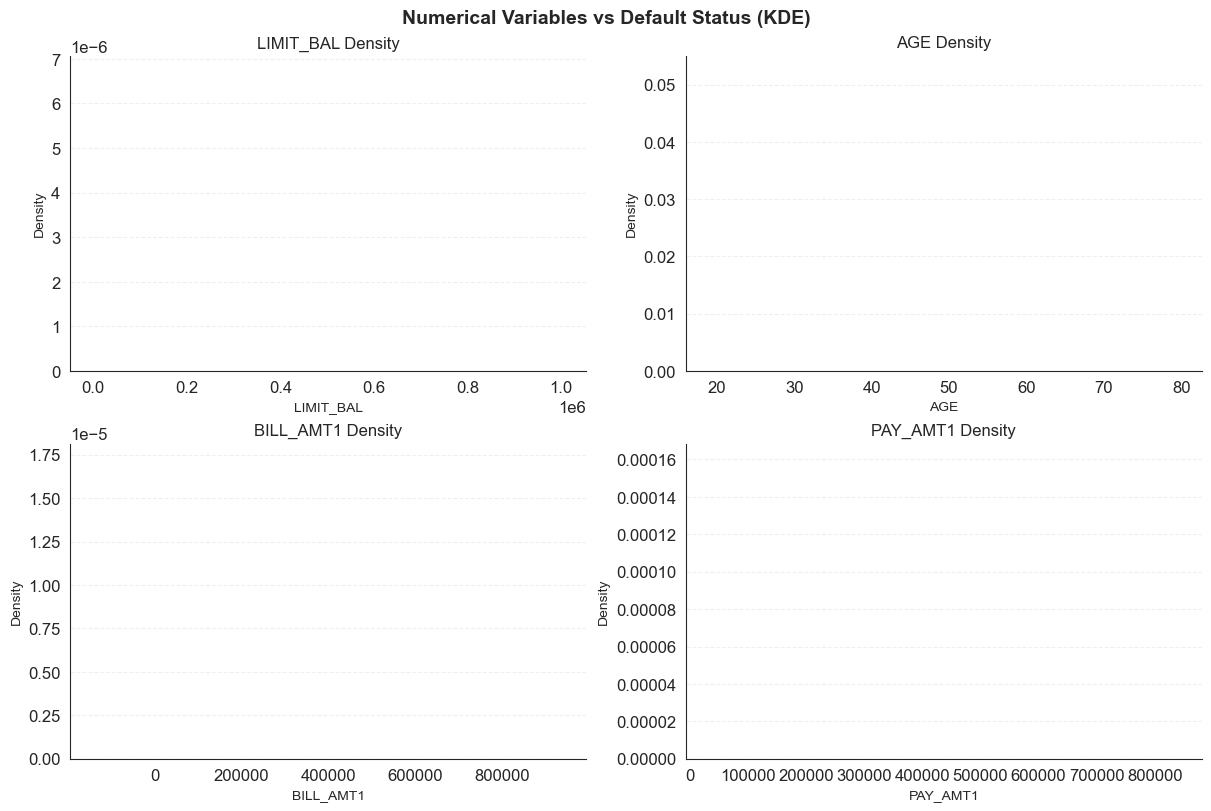

In [30]:
# Set style
sns.set_style("white")
plt.rcParams['font.size'] = 12

# Define numerical variables
numerical_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'PAY_AMT1']

# Precompute KDE data
kde_data = {}
for col in numerical_cols:
    if col in df.columns:
        kde_data[col] = {}
        for default_val, label in [(0, 'No Default'), (1, 'Default')]:
            data = df[df['default.payment.next.month'] == default_val][col].dropna()
            if len(data) > 0:  # Ensure data exists
                kde = sns.kdeplot(data, color='black').get_lines()[0].get_data()
                kde_data[col][default_val] = {'x': kde[0], 'y': kde[1]}
            plt.close()  # Close temporary plot

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(12, 8), constrained_layout=True)
axes = axes.flatten()

# Animation update function
def update_kde(frame):
    for ax in axes:
        ax.clear()
    
    fraction = frame / 50  # Gradually draw curves
    for i, col in enumerate(numerical_cols):
        if col in kde_data:
            for default_val, color, label in [(0, '#FF69B4', 'No Default'), (1, '#C71585', 'Default')]:
                if default_val in kde_data[col]:
                    x = kde_data[col][default_val]['x']
                    y = kde_data[col][default_val]['y']
                    idx = int(len(x) * fraction)
                    axes[i].fill_between(x[:idx], y[:idx], color=color, alpha=0.4)
                    axes[i].plot(x[:idx], y[:idx], color=color, linewidth=2)
            
            # Customize
            axes[i].set_title(f'{col} Density', fontsize=12)
            axes[i].set_xlabel(col, fontsize=10)
            axes[i].set_ylabel('Density', fontsize=10)
            axes[i].grid(axis='y', linestyle='--', alpha=0.3)
            axes[i].spines[['top', 'right']].set_visible(False)
            if frame == 50:  # Add legend in final frame
                axes[i].legend(['No Default', 'Default'])
            # Set consistent limits
            axes[i].set_xlim(min(kde_data[col][0]['x'].min(), kde_data[col][1]['x'].min()),
                             max(kde_data[col][0]['x'].max(), kde_data[col][1]['x'].max()))
            axes[i].set_ylim(0, max(kde_data[col][0]['y'].max(), kde_data[col][1]['y'].max()) * 1.1)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

fig.suptitle('Numerical Variables vs Default Status (KDE)', fontsize=14, weight='bold')
ani = FuncAnimation(fig, update_kde, frames=range(51), interval=100, repeat=False)
plt.savefig('kde_plots_pink_animated.png', dpi=300, bbox_inches='tight')  # Save final frame
plt.show()

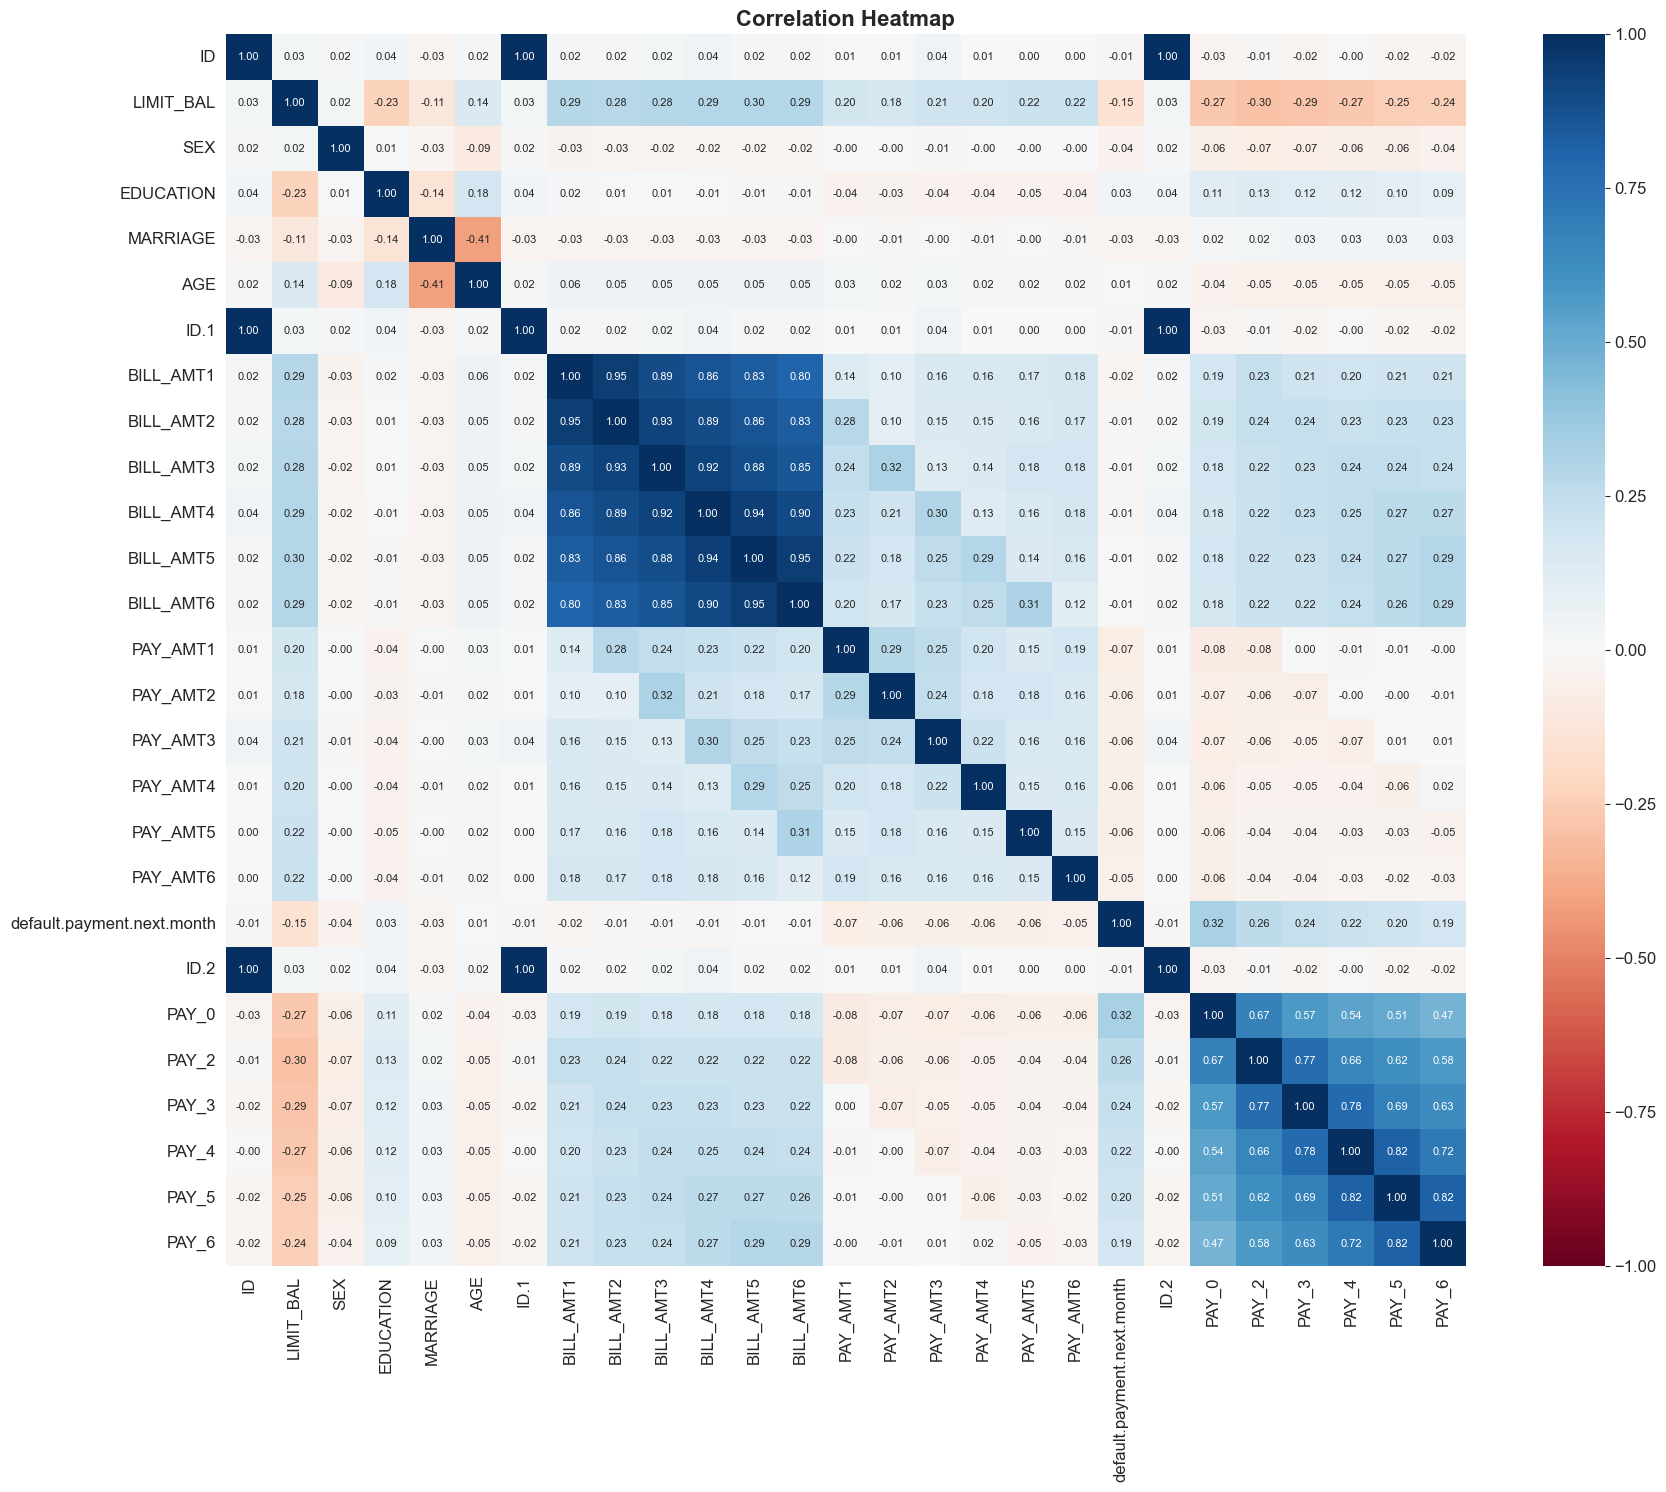

In [33]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1, fmt='.2f', annot_kws={'fontsize': 8})
plt.title('Correlation Heatmap', fontsize=16, weight='bold')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


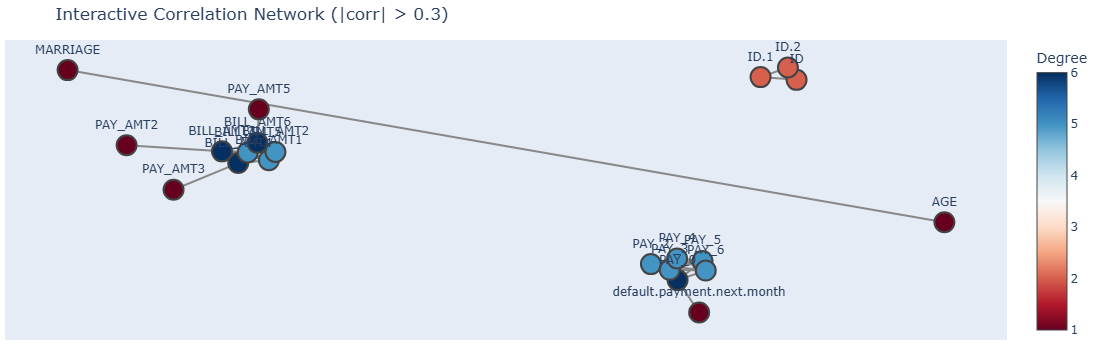

In [34]:
corr_matrix = df.corr()
G = nx.Graph()
threshold = 0.3  # Only include correlations above this threshold
for i in range(len(corr_matrix.columns)):
    for j in range(i + 1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > threshold:
            G.add_edge(corr_matrix.columns[i], corr_matrix.columns[j], weight=corr_value)

pos = nx.spring_layout(G)
edge_x, edge_y = [], []
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

node_x, node_y = [], []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y, line=dict(width=2, color='#888'), hoverinfo='none', mode='lines')
node_trace = go.Scatter(
    x=node_x, y=node_y, mode='markers+text', text=list(G.nodes()), textposition='top center',
    marker=dict(showscale=True, colorscale='RdBu', size=20, color=list(dict(G.degree()).values()),
                colorbar=dict(title='Degree'), line_width=2))

fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(title='Interactive Correlation Network (|corr| > 0.3)', 
                                 showlegend=False, hovermode='closest',
                                 margin=dict(b=20,l=5,r=5,t=40),
                                 xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                                 yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.show()


In [ ]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/e5/bb/dc75933de86e6076f58cf68325877be952a97a371c26b252013f1258a5a7/shap-0.47.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for slicer==0.0.8 from https://files.pythonhosted.org/packages/63/81/9ef641ff4e12cbcca30e54e72fb0951a2ba195d0cda0ba4100e532d929db/slicer-0.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/544.4 kB ? eta -:--:--
   -- ------------------------------------ 41.0/544.4 kB 991.0 kB/s eta 0:00:01
   ---- ---------------------------------- 61.4/544.4 kB 656.4 kB/s eta 0:00:01
   ----- --------------------------------- 81.9/544.4 kB 651.6 kB/s eta 0:00:01
   --------- ---------------------------- 133.1/544.4 kB 983.0 kB/s eta 0:00:01
   ---------- --------------------------- 153.6/544.4 kB 706.2 kB/s eta 0:00:01
   ---------------- --------------------- 235.5/544.4 kB 901.1 kB/s eta 0:00:01
   ------------------ ------------------- 

In [37]:
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier
import plotly.io as pio
pio.renderers.default = 'browser'

X = df.drop(columns=['ID', 'default.payment.next.month']).fillna(0)  # Features
y = df['default.payment.next.month']  # Target

# Train Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X, y)

# Get feature importance (top 10 features)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False).head(10)

# Get correlation with default
corr = df.corr()['default.payment.next.month'].drop('default.payment.next.month').sort_values(ascending=False)

# 1. Feature Importance Bar Plot
fig1 = go.Figure()

bar_trace = go.Bar(
    x=feature_importance['importance'],
    y=feature_importance['feature'],
    orientation='h',
    marker=dict(color=feature_importance['importance'], colorscale='RdBu', line=dict(color='skyblue', width=2)),
    text=[f'{imp*100:.1f}%' for imp in feature_importance['importance']],
    textposition='auto',
    hoverinfo='text',
    hovertext=[f'{feat}: {imp*100:.1f}%' for feat, imp in zip(feature_importance['feature'], feature_importance['importance'])]
)

fig1.add_trace(bar_trace)
fig1.update_layout(
    title='Feature Importance for Default Prediction',
    xaxis=dict(title='Importance (%)', range=[0, feature_importance['importance'].max() * 1.1]),
    yaxis=dict(title='Features', autorange='reversed'),
    margin=dict(b=20, l=5, r=5, t=40),
    font=dict(family='Arial', size=12),
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(0,0,0,0)',
    showlegend=False
)